In [1]:
import numpy as np
import os
import cPickle as pickle
import os.path
import matplotlib.pyplot as plt

import sys
sys.path.append("../../Interactive_Graph_Visualizer/networkx-master")
import networkx as nx
sys.path.append("../../MyPythonModule")
from LDA_kai import LDA

In [2]:
def suffix_generator(target=None,is_largest=False):
    suffix = ""
    if target != None:
        suffix += "_" + target
    if is_largest == True:
        suffix += "_largest"
    return suffix

In [3]:
def compare4_2(p,q):
    weight = np.exp(-((p-q)**2).sum())
    return weight

In [4]:
def compare_selector(name):
    if name == "comp1":
        return compare1
    elif name == "comp1_1":
        return compare1_1
    elif name == "comp1_2" or name == "softmax":
        return compare1_2
    elif name == "comp2":
        return compare2
    elif name == "comp3":
        return compare3
    elif name == "comp4_1":
        return compare4_1
    elif name == "comp4_2":
        return compare4_2
    else:
        print "invalid comp_func"
        exit()

In [5]:
def mode(a, axis=0):
    scores = np.unique(np.ravel(a))       # get ALL unique values
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis),axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return int(mostfrequent)

In [6]:
search_word = u"iPhone"
max_page = 10
root_dir = "../Data/Search_" + search_word + "_" + unicode(max_page) + "_add_childs" 
is_largest = True
target = "myexttext"
G_name = "G" + suffix_generator(target=target,is_largest=is_largest)
use_to_link = "to_ext_links"
K = 10
iteration = 50
alpha = 0.001
beta = 0.001
no_below = 5#単語の最低出現文書数
no_above = 0.2#単語の最大出現文書比率
no_less = 20#文書に含まれる最低単語数
do_hparam_update = False#パラメータを更新するか否か
chasen_dir_name = "Chasen" + suffix_generator(target,is_largest)
exp_name = "K" + unicode(K) + suffix_generator(target,is_largest)
comment = None
comp_func_name = "comp4_2"
void_node_remove = True#空のノード(LDA結果のないノード)を除去するかどうか

In [7]:
COLORLIST_R = [r"#EB6100",r"#F39800",r"#FCC800",r"#FFF100",r"#CFDB00",r"#8FC31F",r"#22AC38",r"#009944",r"#009B6B",r"#009E96",r"#00A0C1",r"#00A0E9",r"#0086D1",r"#0068B7",r"#00479D",r"#1D2088",r"#601986",r"#920783",r"#BE0081",r"#E4007F",r"#E5006A",r"#E5004F",r"#E60033"]
len(COLORLIST_R)

23

In [8]:
COLORLIST_R[::2]

['#EB6100',
 '#FCC800',
 '#CFDB00',
 '#22AC38',
 '#009B6B',
 '#00A0C1',
 '#0086D1',
 '#00479D',
 '#601986',
 '#BE0081',
 '#E5006A',
 '#E60033']

In [9]:
COLORLIST_R = [r"#EB6100",r"#F39800",r"#FCC800",r"#FFF100",r"#CFDB00",r"#8FC31F",r"#22AC38",r"#009944",r"#009B6B",r"#009E96",r"#00A0C1",r"#00A0E9",r"#0086D1",r"#0068B7",r"#00479D",r"#1D2088",r"#601986",r"#920783",r"#BE0081",r"#E4007F",r"#E5006A",r"#E5004F",r"#E60033"]
COLORLIST = [c for c in COLORLIST_R[::2]]#色のステップ調整
COLORLIST

['#EB6100',
 '#FCC800',
 '#CFDB00',
 '#22AC38',
 '#009B6B',
 '#00A0C1',
 '#0086D1',
 '#00479D',
 '#601986',
 '#BE0081',
 '#E5006A',
 '#E60033']

In [10]:
len(COLORLIST)

12

In [11]:
DEFAULT_WEIGHT = 0.5

In [12]:
exp_dir = os.path.join(root_dir,exp_name)
nx_dir = os.path.join(exp_dir,"nx_datas")
if not os.path.exists(nx_dir):
    os.mkdir(nx_dir)

In [13]:
compare = compare_selector(comp_func_name)
weights_list = []
G_path = G_name + ".gpkl"

In [14]:
with open(os.path.join(exp_dir,"instance.pkl")) as fi:
   lda = pickle.load(fi)
with open(os.path.join(root_dir,G_path)) as fi:
    G = pickle.load(fi)

In [15]:
theta = lda.theta()
len(theta)

43

In [16]:
theta

array([[  1.81785130e-05,   1.81785130e-05,   1.81785130e-05,
          1.81785130e-05,   1.81785130e-05,   1.81785130e-05,
          1.81803308e-01,   7.27158698e-01,   1.81785130e-05,
          9.09107435e-02],
       [  8.13975119e-02,   1.16265551e-05,   2.32542728e-01,
          1.16265551e-05,   1.16265551e-05,   1.16265551e-05,
          1.16265551e-05,   3.83687943e-01,   1.16265551e-05,
          3.02302058e-01],
       [  1.47044987e-01,   2.94031167e-05,   2.94031167e-05,
          2.94031167e-05,   2.35254337e-01,   1.17641870e-01,
          2.94031167e-05,   4.11673037e-01,   2.94031167e-05,
          8.82387533e-02],
       [  1.35116876e-05,   1.62153763e-01,   4.05364140e-01,
          1.35116876e-05,   1.35116876e-05,   1.35116876e-05,
          1.35116876e-05,   4.32387515e-01,   1.35116876e-05,
          1.35116876e-05],
       [  1.57975387e-06,   1.57975387e-06,   1.57975387e-06,
          4.20216110e-01,   1.57975387e-06,   1.57975387e-06,
          1.57975387e-06

In [17]:
theta.shape

(43, 10)

In [18]:
theta[0]

array([  1.81785130e-05,   1.81785130e-05,   1.81785130e-05,
         1.81785130e-05,   1.81785130e-05,   1.81785130e-05,
         1.81803308e-01,   7.27158698e-01,   1.81785130e-05,
         9.09107435e-02])

In [19]:
nodes = G.node#参照渡しなのでG自体に改変が伝わる
old_node_num = len(nodes)
old_node_num

53

In [20]:
nodes_lim = len(nodes)
nodes_lim

53

In [21]:
file_id_dict_inv = {v:k for k, v in lda.file_id_dict.items()}#ファイル名とLDAでの文書番号(逆引き)．LDAの方に作っとけばよかった．．．
file_id_dict_inv

{0: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 9: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 16: 13,
 17: 14,
 18: 15,
 19: 16,
 20: 17,
 21: 18,
 22: 19,
 24: 20,
 25: 21,
 26: 22,
 27: 23,
 28: 24,
 29: 25,
 31: 26,
 32: 27,
 34: 28,
 35: 29,
 36: 30,
 38: 31,
 40: 32,
 41: 33,
 42: 34,
 43: 35,
 44: 36,
 47: 37,
 48: 38,
 49: 39,
 50: 40,
 52: 41,
 53: 42}

In [22]:
for m,z_m in enumerate(lda.z_m_n[:nodes_lim]):
    node_no = lda.file_id_dict.get(m)#ファイルが連番でない対象に対応
    if node_no not in G.node:
        continue
    """代表トピックの抽出"""
    rep_topic = mode(np.array(z_m))
    nodes[node_no]["topic"] = rep_topic
    nodes[node_no]["color"] = COLORLIST[rep_topic]

    """トピック分布の円グラフ保存"""
    #fig = plt.figure()
    #ax = fig.add_subplot(1,1,1)
    #theta_d = theta[m]
    #plt.rcParams['font.size']=20.0
    #ax.pie(theta_d,colors=COLORLIST[:lda.K],labels=labels,startangle=90,radius=0.2, center=(0.5, 0.5), frame=True,counterclock=False)
    #plt.axis("off")
    #plt.axis('equal')
    #plt.savefig(os.path.join(pie_dir,unicode(lda.file_id_dict[m])+".png"))
    #plt.close()

In [23]:
mode(np.array(z_m))

0

In [24]:
nodes[0]

{'color': '#00479D', 'topic': 7}

In [25]:
if void_node_remove == True:
    remove_node_list = []#LDAでの処理で文書がなくなってしまったものを排除する
    for n, d in G.nodes(data=True):
        if d.get("topic") == None:
            remove_node_list.append(n)
    G.remove_nodes_from(remove_node_list)
    if is_largest == True:
        G_ = G.to_undirected()
        largest = max(nx.connected_component_subgraphs(G_),key=len)
        rem_nodes = set(G_.node.keys()) - set(largest.node.keys())
        G.remove_nodes_from(rem_nodes)
        with open(os.path.join(root_dir,"file_id_list2.list"),"w") as fo:
            pickle.dump(list(G.node.keys()),fo)

In [26]:
new_node_num = len(G.node.keys())
new_node_num

43

In [30]:
len(lda.theta())

43

In [31]:
G.node.keys()

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 44,
 47,
 48,
 49,
 50,
 52,
 53]

simple


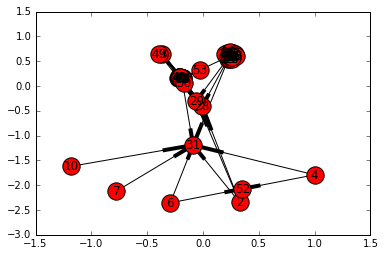

In [32]:
nx.draw_networkx(G)
plt.show()

In [33]:
G.edge[0]

{11: {},
 12: {},
 13: {},
 14: {},
 16: {},
 17: {},
 18: {},
 19: {},
 20: {},
 21: {},
 22: {},
 24: {},
 25: {},
 26: {},
 27: {}}

In [34]:
"""エッジごとの処理"""
edges = G.edge
for node_no,link_node_nos in edges.items():
    lda_no = file_id_dict_inv.get(node_no)#ファイルが連番でない対象に対応
    if lda_no == None:#LDA結果が存在しないノード
        for link_node_no in link_node_nos.keys():
            edges[node_no][link_node_no]["weight"] = DEFAULT_WEIGHT
        continue
    p_dst = theta[lda_no]
    """類似度による重みの算出"""
    for link_node_no in link_node_nos.keys():
        link_lda_no = file_id_dict_inv.get(link_node_no)#ファイルが連番でない対象に対応
        if link_lda_no == None:#LDA結果が存在しないノード
            weight = DEFAULT_WEIGHT
        else:
            q_dst = theta[link_lda_no]
            weight = compare(p_dst,q_dst)
        edges[node_no][link_node_no]["weight"] = weight

In [35]:
G.edge[0]

{11: {'weight': 0.31435346129684483},
 12: {'weight': 0.87027849294586324},
 13: {'weight': 0.37321612771958007},
 14: {'weight': 0.88976053099665342},
 16: {'weight': 0.48349399292921824},
 17: {'weight': 0.8793620192871594},
 18: {'weight': 0.84580512710240618},
 19: {'weight': 0.72924215872461795},
 20: {'weight': 0.41435380593204635},
 21: {'weight': 0.39019884319462456},
 22: {'weight': 0.35341773466948156},
 24: {'weight': 0.41236566316207079},
 25: {'weight': 0.82283728360405384},
 26: {'weight': 0.3815929720754514},
 27: {'weight': 0.80314162447697601}}

In [36]:
edges

{0: {11: {'weight': 0.31435346129684483},
  12: {'weight': 0.87027849294586324},
  13: {'weight': 0.37321612771958007},
  14: {'weight': 0.88976053099665342},
  16: {'weight': 0.48349399292921824},
  17: {'weight': 0.8793620192871594},
  18: {'weight': 0.84580512710240618},
  19: {'weight': 0.72924215872461795},
  20: {'weight': 0.41435380593204635},
  21: {'weight': 0.39019884319462456},
  22: {'weight': 0.35341773466948156},
  24: {'weight': 0.41236566316207079},
  25: {'weight': 0.82283728360405384},
  26: {'weight': 0.3815929720754514},
  27: {'weight': 0.80314162447697601}},
 2: {28: {'weight': 0.73588545588648302},
  29: {'weight': 0.82613486287730031},
  31: {'weight': 0.66131839217445554}},
 3: {9: {'weight': 0.80450083417835749},
  32: {'weight': 0.80876031312638241},
  34: {'weight': 0.80577635288837068},
  35: {'weight': 0.72891935569909883},
  36: {'weight': 0.68043578565912421},
  38: {'weight': 0.80630579853967133},
  40: {'weight': 0.81968105239158184},
  41: {'weight': 

In [37]:
len(edges)

43

In [38]:
compare(theta[1],theta[24])

0.73588545588648302

In [39]:
edges[2][28]

{'weight': 0.73588545588648302}

In [40]:
"""全ノード間距離の算出．上といろいろ重複するが面倒なのでもう一度ループ"""
nodes_lim = len(nodes)#removeしている場合があるため
nodes_lim

43

In [41]:
all_node_weights = np.ones((nodes_lim,nodes_lim))*DEFAULT_WEIGHT#除算の都合上，自分自身との類似度は1に
all_node_weights

array([[ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       ..., 
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5]])

In [42]:
for i,i_node in enumerate(nodes):
    i_lda_no = file_id_dict_inv.get(i_node)#LDA結果が存在しない場合
    if i_lda_no == None:#LDA結果が存在しない場合
        continue

    p_dst = theta[i_lda_no]
    for j,j_node in enumerate(nodes):
        j_lda_no = file_id_dict_inv.get(j_node)#LDA結果が存在しない場合
        if j_lda_no == None:#LDA結果が存在しない場合
            continue
        q_dst = theta[j_lda_no]
        weight = compare(p_dst,q_dst)
        if weight == 0:
            weight = 0.001
        all_node_weights[i,j] = weight
        #all_node_weights[i,j] = all_node_weights[j,i]=weight
        weights_list.append(weight)#ヒストグラム作成用

all_node_weights

array([[ 1.        ,  0.77383475,  0.79982017, ...,  0.45096014,
         0.43585542,  0.49744811],
       [ 0.77383475,  1.        ,  0.84016724, ...,  0.53688251,
         0.45599567,  0.62854357],
       [ 0.79982017,  0.84016724,  1.        , ...,  0.54556357,
         0.54441272,  0.69067331],
       ..., 
       [ 0.45096014,  0.53688251,  0.54556357, ...,  1.        ,
         0.80335537,  0.61409337],
       [ 0.43585542,  0.45599567,  0.54441272, ...,  0.80335537,
         1.        ,  0.44933526],
       [ 0.49744811,  0.62854357,  0.69067331, ...,  0.61409337,
         0.44933526,  1.        ]])

In [43]:
all_node_weights[1,24]

0.73588545588648302

In [44]:
all_node_weights[24,1]

0.73588545588648302

In [45]:
weights_list

[1.0,
 0.77383475337730001,
 0.79982017290592455,
 0.72702589451046862,
 0.61237320673791651,
 0.70834677340017338,
 0.80133190718791436,
 0.75149849732055674,
 0.83442988825639652,
 0.31435346129684483,
 0.87027849294586324,
 0.37321612771958007,
 0.88976053099665342,
 0.48349399292921824,
 0.8793620192871594,
 0.84580512710240618,
 0.72924215872461795,
 0.41435380593204635,
 0.39019884319462456,
 0.35341773466948156,
 0.41236566316207079,
 0.82283728360405384,
 0.3815929720754514,
 0.80314162447697601,
 0.65428818133523892,
 0.65558669587257967,
 0.44327419482477565,
 0.89633842035103228,
 0.75515590076413164,
 0.49759423490815075,
 0.49895853828636361,
 0.61627973475309583,
 0.67751466955500783,
 0.59182654742500451,
 0.34236968218460651,
 0.5046121645815933,
 0.51004050569356185,
 0.36410006811589041,
 0.34703946465894964,
 0.68827496113949838,
 0.45096014078387642,
 0.4358554213786498,
 0.49744811454881444,
 0.77383475337730001,
 1.0,
 0.84016724218737149,
 0.85510528097478589,
 0

In [46]:
len(weights_list)

1849

In [47]:
weights_list.count(1)

43

In [48]:
with open(os.path.join(nx_dir,"G_with_params_"+comp_func_name+".gpkl"),'w') as fo:
    pickle.dump(G,fo)
with open(os.path.join(nx_dir,"all_node_weights_"+comp_func_name+".gpkl"),'w') as fo:
    pickle.dump(all_node_weights,fo)
with open(os.path.join(nx_dir,"G_with_params_" + comp_func_name + ".txt"),'w') as fo:
    print >> fo,"LDAを実行した後，LDAの結果がないノードを削除し，最大ノード群を再選択"
    print >> fo,"この時点で、ノードには代表トピックとその色、エッジには重みの情報を渡している。"
    print >> fo,"old_node_number:" + str(old_node_num) + "（G_myexttext_largest.gpkl）"
    print >> fo,"new_node_number:" + str(new_node_num) + "（G_with_params_comp4_2.gpkl）"

In [49]:
"""weightのヒストグラム作成"""
fig_w = plt.figure()
ax = fig_w.add_subplot(1,1,1)
weights_array = np.array(weights_list,dtype=np.float)
ax.hist(weights_array,bins=100)
plt.text(0.5, 0.9, "max="+"{0:.3f}".format(weights_array.max()), transform=ax.transAxes)
plt.text(0.5, 0.85, "min="+"{0:.3g}".format(weights_array.min()), transform=ax.transAxes)
fig_w.show()
fig_w.savefig(os.path.join(nx_dir,comp_func_name+"_hist.png"))

/home/yukichika/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


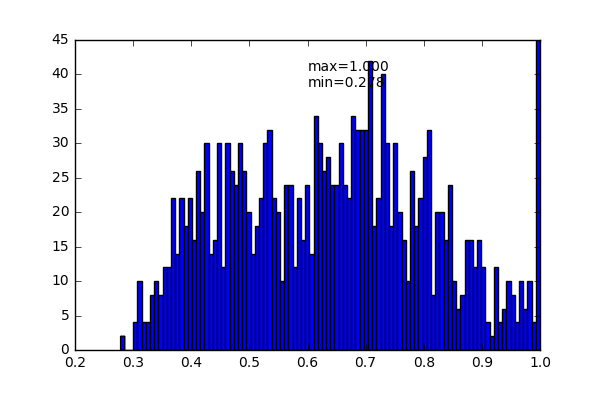

In [50]:
from IPython.display import Image, display_png
display_png(Image(os.path.join(nx_dir,comp_func_name+"_hist.png")))

In [51]:
""""トピックと色の対応グラフを作成"""
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sample = np.ones(lda.K)
labels = [unicode(x+1) for x in range(lda.K)]
plt.rcParams['font.size']=20.0
ax.pie(sample,colors=COLORLIST[:lda.K],labels=labels,startangle=90,radius=0.2, center=(0.5, 0.5), frame=True,counterclock=False)
plt.axis("off")
plt.axis('equal')
plt.savefig(os.path.join(exp_dir,"Topic"+unicode(lda.K)+"_pie.png"))

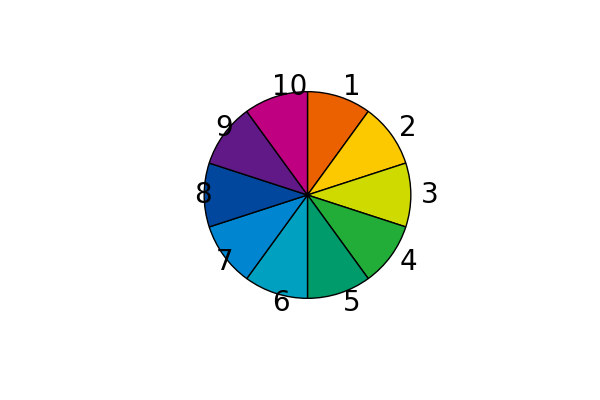

In [52]:
display_png(Image(os.path.join(exp_dir,"Topic"+unicode(lda.K)+"_pie.png")))

In [53]:
""""文書全体でのトピック比率をグラフ化"""
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sample = lda.theta().sum(axis=0)
labels = [unicode(x+1) for x in range(lda.K)]
plt.rcParams['font.size']=20.0
ax.pie(sample,colors=COLORLIST[:lda.K],labels=labels,startangle=90,radius=0.2, center=(0.5, 0.5), frame=True,counterclock=False)
#ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]))
plt.axis("off")
plt.axis('equal')
plt.savefig(os.path.join(exp_dir,"Topic"+unicode(lda.K)+"_share_pie.png"))

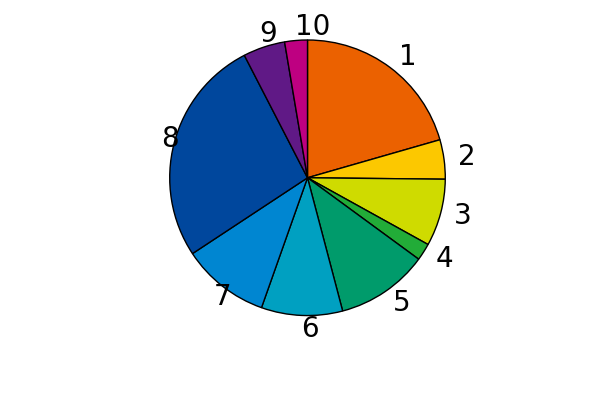

In [54]:
display_png(Image(os.path.join(exp_dir,"Topic"+unicode(lda.K)+"_share_pie.png")))